<a href="https://colab.research.google.com/github/rennyjkim/CS146/blob/main/PS2/PS2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount your own google drive to Colab
from google.colab import drive
drive.mount('/content/drive')
import sys
# Change the path below to the path where your folder locates
sys.path.append('/content/drive/My Drive/COMSCI M146/HW/PS2')

Mounted at /content/drive


In [ ]:
"""
Author      : Yi-Chieh Wu, Sriram Sankararaman
"""

# This code was adapted from course material by Jenna Wiens (UMichigan).

# python libraries
import os

# numpy libraries
import numpy as np

# matplotlib libraries
import matplotlib.pyplot as plt

# tabluate library
from tabulate import tabulate

# time library
import time

In [ ]:
######################################################################
# classes
######################################################################

class Data :

    def __init__(self, X=None, y=None) :
        """
        Data class.

        Attributes
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets
        """

        # n = number of examples, d = dimensionality
        self.X = X
        self.y = y

    def load(self, filename) :
        """
        Load csv file into X array of features and y array of labels.

        Parameters
        --------------------
            filename -- string, filename
        """

        # load data
        with open(filename, 'r') as fid :
            data = np.loadtxt(fid, delimiter=",")

        # separate features and labels
        self.X = data[:,:-1]
        self.y = data[:,-1]

    def plot(self, **kwargs) :
        """Plot data."""

        if 'color' not in kwargs :
            kwargs['color'] = 'b'

        plt.scatter(self.X, self.y, **kwargs)
        plt.xlabel('x', fontsize = 16)
        plt.ylabel('y', fontsize = 16)
        plt.show()

# wrapper functions around Data class
def load_data(filename) :
    data = Data()
    data.load(filename)
    return data

def plot_data(X, y, **kwargs) :
    data = Data(X, y)
    data.plot(**kwargs)

In [ ]:
class PolynomialRegression() :

    def __init__(self, m=1) :
        """
        Ordinary least squares regression.

        Attributes
        --------------------
            coef_   -- numpy array of shape (d,)
                       estimated coefficients for the linear regression problem
            m_      -- integer
                       order for polynomial regression
        """
        self.coef_ = None
        self.m_ = m


    def generate_polynomial_features(self, X) :
        """
        Maps X to an mth degree feature vector e.g. [1, X, X^2, ..., X^m].

        Parameters
        --------------------
            X       -- numpy array of shape (n,1), features

        Returns
        --------------------
            Phi     -- numpy array of shape (n,(m+1)), mapped features
        """

        n,d = X.shape

        ### ========== TODO : START ========== ###
        # part b: modify to create matrix for simple linear model
      #  temp_np = np.ones([n,1])
        #X = np.append(temp_np, X, 1)

        # part g: modify to create matrix for polynomial model
        Phi = X
        m = self.m_

        Phi = np.ones((n,m+1))
        Power = np.arange(m+1)
        for a in range(n):
          Row = np.repeat(X[a], m+1)
          Row = np.power(Row, Power)
          Phi[a] = Row
        ### ========== TODO : END ========== ###

        return Phi


    def fit_GD(self, X, y, eta=0.01,
                eps=0, tmax=10000, verbose=False) :
        """
        Finds the coefficients of a {d-1}^th degree polynomial
        that fits the data using least squares batch gradient descent.

        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets
            eta     -- float, step size
            eps     -- float, convergence criterion
            tmax    -- integer, maximum number of iterations
            verbose -- boolean, for debugging purposes

        Returns
        --------------------
            self    -- an instance of self
        """

        if verbose :
            plt.subplot(1, 2, 2)
            plt.xlabel('iteration')
            plt.ylabel(r'$J(\theta)$')
            plt.ion()
            plt.show()

        X = self.generate_polynomial_features(X) # map features
        n,d = X.shape
        eta_input = eta
        self.coef_ = np.zeros(d)                 # coefficients
        err_list  = np.zeros((tmax,1))           # errors per iteration

        startT = time.time()
        # GD loop
        for t in range(tmax) :
            ### ========== TODO : START ========== ###
            # part f: update step size
            # change the default eta in the function signature to 'eta=None'
            # and update the line below to your learning rate function
            k = 100
            if eta_input is None :
                eta = 1 / (1+k)
            else :
                eta = eta_input
            ### ========== TODO : END ========== ###

            ### ========== TODO : START ========== ###
            # part d: update theta (self.coef_) using one step of GD
            # hint: you can write simultaneously update all theta using vector math
            #cost = 0
            #w_theta = np.array(list(self.coef_))

            #for i, val in enumerate(self.coef_):
              #ttt = 0
              #for j, kmn in enumerate(X):
               # ttt += (np.dot(w_theta, kmn) - y[j]) * kmn[i]
              #self.coef_[i] += (-2) * eta * ttt
            # track error
            # hint: you cannot use self.predict(...) to make the predictions
            y_pred = np.dot(X, self.coef_)
            err_list[t] = np.sum(np.power(y - y_pred, 2)) / float(n)
            self.coef_ = self.coef_ - 2*eta*np.dot(X.transpose(), (y_pred-y))

            ### ========== TODO : END ========== ###

            # stop?
            if t > 0 and abs(err_list[t] - err_list[t-1]) <= eps :
                break

            # debugging
            if verbose :
                x = np.reshape(X[:,1], (n,1))
                cost = self.cost(x,y)
                plt.subplot(1, 2, 1)
                plt.cla()
                plot_data(x, y)
                self.plot_regression()
                plt.subplot(1, 2, 2)
                plt.plot([t+1], [cost], 'bo')
                plt.suptitle('iteration: %d, cost: %f' % (t+1, cost))
                plt.draw()
                plt.pause(0.05) # pause for 0.05 sec
        endT = time.time()
        totalT = endT - startT
        print('number of iterations: %d'%(t+1))
        print(totalT)

        return self


    def fit(self, X, y) :
        """
        Finds the coefficients of a {d-1}^th degree polynomial
        that fits the data using the closed form solution.

        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets

        Returns
        --------------------
            self    -- an instance of self
        """

        X = self.generate_polynomial_features(X) # map features

        ### ========== TODO : START ========== ###
        # part e: implement closed-form solution
        # hint: use np.dot(...) and np.linalg.pinv(...)
        #       be sure to update self.coef_ with your solution
        startT = time.time()
        theta = np.linalg.pinv(np.dot(np.transpose(X), X)).dot(np.transpose(X)).dot(y)
        # temp = np
        # temp2 = np
        endT = time.time()
        totalT = endT - startT
        self.coef_ = theta
        print(f"coef_: {self.coef_}\tRun Time: {totalT}")
        ### ========== TODO : END ========== ###


    def predict(self, X) :
        """
        Predict output for X.

        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features

        Returns
        --------------------
            y       -- numpy array of shape (n,), predictions
        """
        if self.coef_ is None :
            raise Exception("Model not initialized. Perform a fit first.")

        X = self.generate_polynomial_features(X) # map features

        ### ========== TODO : START ========== ###
        # part c: predict y
        # y = thetaT dot x
        y = np.dot(X, np.transpose(self.coef_))
        ### ========== TODO : END ========== ###

        return y


    def cost(self, X, y) :
        """
        Calculates the objective function.

        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets

        Returns
        --------------------
            cost    -- float, objective J(theta)
        """
        ### ========== TODO : START ========== ###
        # part d: compute J(theta)
        cost = 0
        h = self.predict(X)

        for i, t in enumerate(h):
          cost += (h[i] - y[i]) ** 2
        ### ========== TODO : END ========== ###
        return cost


    def rms_error(self, X, y) :
        """
        Calculates the root mean square error.

        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets

        Returns
        --------------------
            error   -- float, RMSE
        """
        ### ========== TODO : START ========== ###
        # part h: compute RMSE
        n,d = X.shape
        obj = self.cost(X,y)
        #N is the number of training data points
        error = np.sqrt(obj/n)
        ### ========== TODO : END ========== ###
        return error


    def plot_regression(self, xmin=0, xmax=1, n=50, **kwargs) :
        """Plot regression line."""
        if 'color' not in kwargs :
            kwargs['color'] = 'r'
        if 'linestyle' not in kwargs :
            kwargs['linestyle'] = '-'

        X = np.reshape(np.linspace(0,1,n), (n,1))
        y = self.predict(X)
        plot_data(X, y, **kwargs)
        plt.show()

Visualizing data...


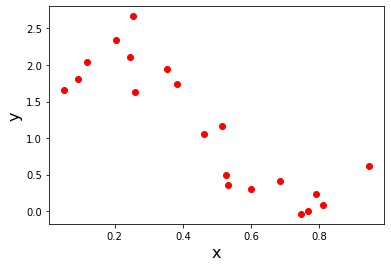

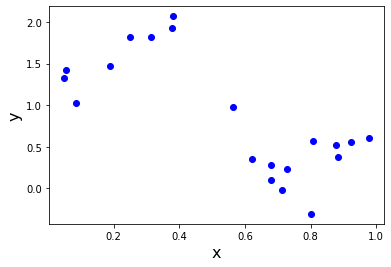

Investigating linear regression...
40.233847409671
number of iterations: 10000
0.22323036193847656
number of iterations: 7021
0.18815350532531738
number of iterations: 765
0.018396377563476562


/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-5-7a5af00ac404>:114: RuntimeWarning: overflow encountered in power
  err_list[t] = np.sum(np.power(y - y_pred, 2)) / float(n)
<ipython-input-5-7a5af00ac404>:120: RuntimeWarning: invalid value encountered in subtract
  if t > 0 and abs(err_list[t] - err_list[t-1]) <= eps :
<ipython-input-5-7a5af00ac404>:115: RuntimeWarning: invalid value encountered in subtract
  self.coef_ = self.coef_ - 2*eta*np.dot(X.transpose(), (y_pred-y))


number of iterations: 10000
0.23235177993774414
  Step Size  Coefficient                  Final Value
-----------  -------------------------  -------------
     0.0001  [ 2.27044798 -2.46064834]        4.0864
     0.001   [ 2.4464068 -2.816353 ]          3.91258
     0.01    [ 2.44640703 -2.81635347]        3.91258
     0.1     [nan nan]                      nan

 part e, closed form solution
coef_: [ 2.44640709 -2.81635359]	Run Time: 0.017969369888305664


part f
number of iterations: 765
0.018657922744750977
Step Size    Coefficient                  Final Value
-----------  -------------------------  -------------
0.0001       [ 2.27044798 -2.46064834]        4.0864
0.001        [ 2.4464068 -2.816353 ]          3.91258
0.01         [ 2.44640703 -2.81635347]        3.91258
0.1          [nan nan]                      nan
k            [ 2.44640702 -2.81635344]        3.91258
Investigating polynomial regression...
coef_: [ 2.44640709 -2.81635359]	Run Time: 0.000179290771484375
coef_: [ 2

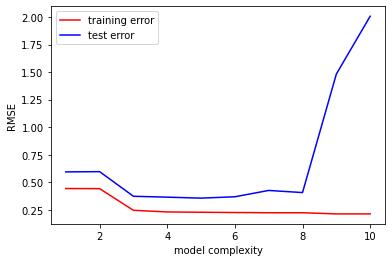

Done!


In [ ]:

######################################################################
# main
######################################################################

def main() :
    # load data
    # Use the abs path on your own Google Drive
    train_data = load_data("/content/drive/My Drive/COMSCI M146/HW/PS2/regression_train.csv")
    test_data = load_data("/content/drive/My Drive/COMSCI M146/HW/PS2/regression_test.csv")

    # print(train_data.X.shape, train_data.y.shape)
    # print(test_data.X.shape, test_data.y.shape)


    ### ========== TODO : START ========== ###
    # part a: main code for visualizations
    print('Visualizing data...')
    plot_data(train_data.X, train_data.y, color='red', label='Training Data')
    plot_data(test_data.X, test_data.y, color='blue')
    ### ========== TODO : END ========== ###



    ### ========== TODO : START ========== ###
    # parts b-f: main code for linear regression
    print('Investigating linear regression...')

    # part d - section 1  (Expected Value  = 40.234)
    model = PolynomialRegression()
    model.coef_ = np.zeros(2)
    print(model.cost(train_data.X, train_data.y))
    ### ========== TODO : END ========== ###

    # part d - section 3
    step_size_list = [pow(10, -4), pow(10, -3), pow(10, -2), 0.1]   # 0.1 causes overflow!
    #step_size_list = [pow(10, -4), pow(10, -3), pow(10, -2)]
    table = [["Step Size", "Coefficient", "Final Value"]]
    for step in step_size_list:
      model.fit_GD(train_data.X, train_data.y, eta=step)
      cost_temp = model.cost(train_data.X, train_data.y)
      table.append([str(step), str(model.coef_), str(model.cost(train_data.X, train_data.y))])


    print(tabulate(table, headers='firstrow'))

    # part e
    print("\n part e, closed form solution")
    model.fit(train_data.X, train_data.y)
    print("\n")

    # part f
    print("part f")
    model.fit_GD(train_data.X, train_data.y, eta = None, tmax=10000000)
    table.append([str("k"), str(model.coef_), str(model.cost(train_data.X, train_data.y))])
    print(tabulate(table, headers='firstrow'))
    ### ========== TODO : END ========== ###


    ### ========== TODO : START ========== ###
    # parts g-i: main code for polynomial regression

    print('Investigating polynomial regression...')
    modelComplexity = np.arange(1,11,1)
    trainError = np.zeros(10)
    cost = np.zeros(10)
    testError = np.zeros(10)
    cost2 = np.zeros(10)
    for a in modelComplexity:
        model2 = PolynomialRegression(m=a)
        model2.fit(train_data.X, train_data.y)
        trainError[a-1] = model2.rms_error(train_data.X, train_data.y)
        cost[a-1] = model2.cost(train_data.X, train_data.y)
        testError[a-1] = model2.rms_error(test_data.X, test_data.y)
        cost2[a-1] = model2.cost(test_data.X, test_data.y)

    plt.plot(modelComplexity, trainError, color='red', label='training error')
    plt.plot(modelComplexity, testError, color='blue', label='test error')
    plt.legend()
    plt.xlabel('model complexity')
    plt.ylabel('RMSE')
    plt.legend()
    plt.show()
    ### ========== TODO : END ========== ###




    print("Done!")

if __name__ == "__main__":
    main()
